# Introduction

The Sephora Products Recommender System project aims to develop a personalized recommendation system for Sephora, a leading beauty and cosmetics e-commerce platform. The objective is to assist Sephora's customers in discovering relevant and appealing products tailored to their unique preferences and needs. The goal of this project is to enhance the user experience, boost customer satisfaction, and drive sales through personalized product recommendations.

This project focuses on two popular recommendation techniques: content-based filtering and collaborative filtering. Content-based filtering leverages key product attributes such as brand, ingredients, and primary category to identify similarities between products and provide recommendations aligned with a user's preferences. On the other hand, collaborative filtering utilizes user-item interactions, specifically user ratings, to discover patterns and recommend items based on the preferences of similar users.

The project will employ content-based filtering using cosine similarity and collaborative filtering using the Singular Value Decomposition (SVD) technique. These approaches have proven to be effective in uncovering similarities between products and users, enabling the generation of accurate and relevant recommendations.

# Dataset
 
The dataset used in this project was collected from the Kaggle dataset titled ["Sephora Products and Skincare Reviews"](https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews). It was obtained through a Python scraper in March 2023. It consists of comprehensive information about more than 8,000 beauty products available on the Sephora online store. Each product in the dataset is associated with various attributes, including the product name, brand name, price, ingredients, ratings, and other relevant features.

For the purpose of this project, two specific files will be utilized: product_info.csv and reviews_1500_end.csv. The user reviews used for analysis and processing will be limited to products starting from ID 1500 onwards. This subset of reviews was chosen to ensure efficient processing and analysis as the data size is relatively smaller compared to the entire dataset.


# Import library

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from surprise import SVD, Reader, Dataset
from surprise.model_selection import cross_validate

# Load Data

In [2]:
# Load the dataset
product_info = pd.read_csv('/kaggle/input/sephora-products-and-skincare-reviews/product_info.csv')
reviews = pd.read_csv('/kaggle/input/sephora-products-and-skincare-reviews/reviews_1500_end.csv')

/tmp/ipykernel_32/2788003480.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.read_csv('/kaggle/input/sephora-products-and-skincare-reviews/reviews_1500_end.csv')


# Data Preprocessing and Cleaning

## Product Data

In [3]:
product_info.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [4]:
product_info.shape

(8494, 27)

In [5]:
product_info

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,2 oz / 60 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,129.0,129.0
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


In [6]:
product_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [7]:
# check missing values
(product_info.isnull() | product_info.empty | product_info.isna()).sum()

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

In [8]:
# use relevant columns
df_product = product_info[['product_id', 'product_name', 'brand_name','ingredients', 'primary_category', 'tertiary_category']]

In [9]:
print(df_product['primary_category'].unique())

['Fragrance' 'Bath & Body' 'Mini Size' 'Hair' 'Makeup' 'Skincare'
 'Tools & Brushes' 'Men' 'Gifts']


In [10]:
# check missing values
(df_product.isnull() | df_product.empty | df_product.isna()).sum()

product_id             0
product_name           0
brand_name             0
ingredients          945
primary_category       0
tertiary_category    990
dtype: int64

In [11]:
# check duplicated
df_product.duplicated().sum()

0

In [12]:
# drop missing values data
df_product = df_product.dropna()

## Review Data

In [13]:
reviews.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1945004256,5,1.0,0.000000,2,2,0,2022-12-10,I absolutely L-O-V-E this oil. I have acne pro...,A must have!,lightMedium,green,combination,NaN,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
1,1,5478482359,3,1.0,0.333333,3,2,1,2021-12-17,I gave this 3 stars because it give me tiny li...,it keeps oily skin under control,mediumTan,brown,oily,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
2,2,29002209922,5,1.0,1.000000,2,0,2,2021-06-07,Works well as soon as I wash my face and pat d...,Worth the money!,lightMedium,brown,dry,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
3,3,7391078463,5,1.0,1.000000,2,0,2,2021-05-21,"this oil helped with hydration and breakouts, ...",best face oil,lightMedium,brown,combination,blonde,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
4,4,1766313888,5,1.0,1.000000,13,0,13,2021-03-29,This is my first product review ever so that s...,Maskne miracle,mediumTan,brown,combination,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0


In [14]:
reviews.shape

(49977, 19)

In [15]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49977 entries, 0 to 49976
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                49977 non-null  int64  
 1   author_id                 49977 non-null  object 
 2   rating                    49977 non-null  int64  
 3   is_recommended            46160 non-null  float64
 4   helpfulness               36522 non-null  float64
 5   total_feedback_count      49977 non-null  int64  
 6   total_neg_feedback_count  49977 non-null  int64  
 7   total_pos_feedback_count  49977 non-null  int64  
 8   submission_time           49977 non-null  object 
 9   review_text               49918 non-null  object 
 10  review_title              35599 non-null  object 
 11  skin_tone                 42776 non-null  object 
 12  eye_color                 43717 non-null  object 
 13  skin_type                 46346 non-null  object 
 14  hair_c

In [16]:
# use relevant columns
df_review = reviews[['author_id', 'product_id', 'rating']]

In [17]:
df_review.head()

,author_id,product_id,rating
0,1945004256,P379064,5
1,5478482359,P379064,3
2,29002209922,P379064,5
3,7391078463,P379064,5
4,1766313888,P379064,5


* The 'author_id' represents the user identifier or user's unique ID.
* The 'product_id' represents the item or product identifier.
* The 'rating' represents the rating given by the user to a specific product.

In [18]:
# check dataframe info
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49977 entries, 0 to 49976
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   author_id   49977 non-null  object
 1   product_id  49977 non-null  object
 2   rating      49977 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [19]:
df_review.describe()

,rating
count,49977.000000
mean,4.212678
std,1.262289
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [20]:
# check missing values
(df_review.isnull() | df_review.empty | df_review.isna()).sum()

author_id     0
product_id    0
rating        0
dtype: int64

In [21]:
# check duplicated
df_review.duplicated().sum()

33

In [22]:
# drop duplicated data
df_review = df_review.drop_duplicates()

# Exploratory Data Analysis

## Product Data

In [23]:
# Product dataframe
df_product.head()

,product_id,product_name,brand_name,ingredients,primary_category,tertiary_category
0,P473671,Fragrance Discovery Set,19-69,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",Fragrance,Perfume Gift Sets
1,P473668,La Habana Eau de Parfum,19-69,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",Fragrance,Perfume
2,P473662,Rainbow Bar Eau de Parfum,19-69,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",Fragrance,Perfume
3,P473660,Kasbah Eau de Parfum,19-69,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",Fragrance,Perfume
4,P473658,Purple Haze Eau de Parfum,19-69,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",Fragrance,Perfume


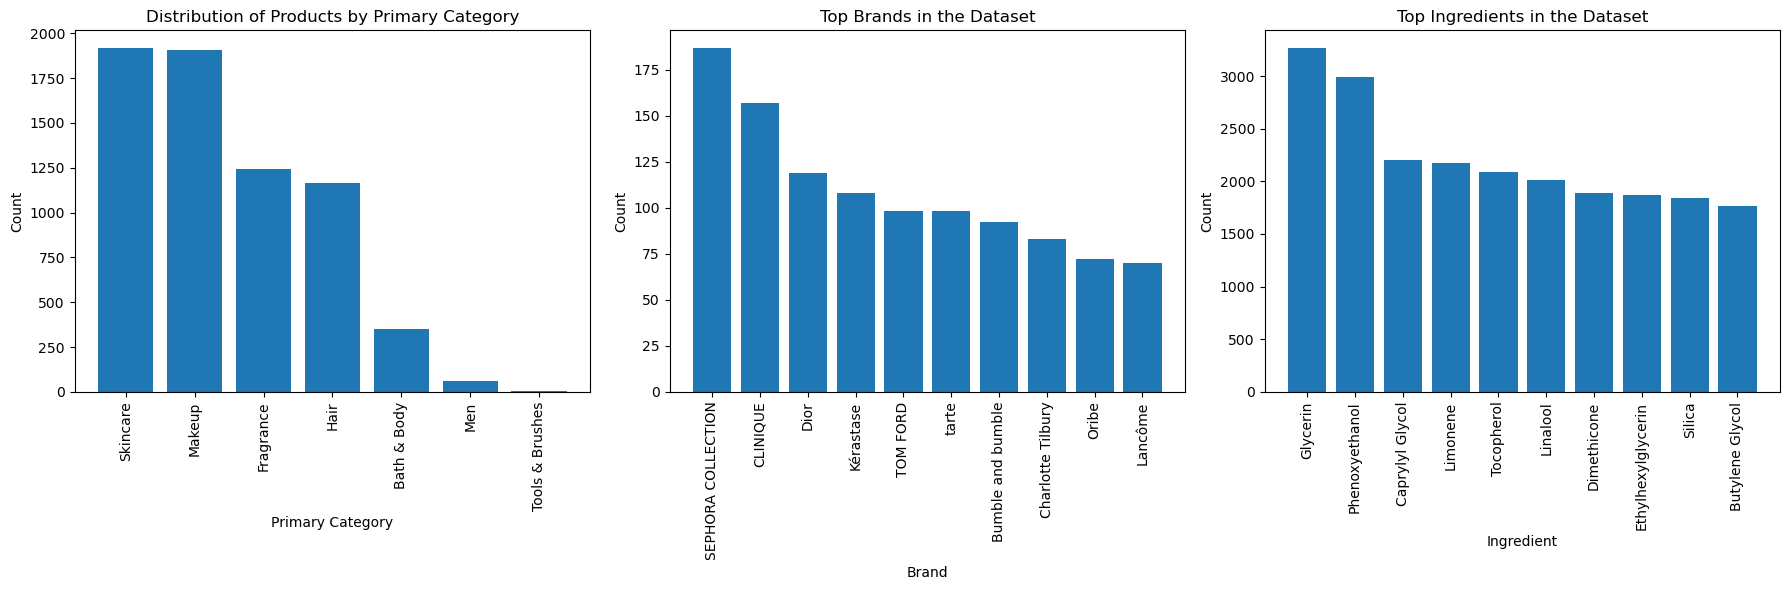

In [24]:
import matplotlib.pyplot as plt

# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Primary Category Analysis
primary_category_counts = df_product['primary_category'].value_counts()
axs[0].bar(primary_category_counts.index, primary_category_counts.values)
axs[0].set_xlabel('Primary Category')
axs[0].set_ylabel('Count')
axs[0].set_title('Distribution of Products by Primary Category')
axs[0].tick_params(axis='x', rotation=90)

# Brand Analysis
brand_counts = df_product['brand_name'].value_counts()
top_brands = brand_counts.head(10)
axs[1].bar(top_brands.index, top_brands.values)
axs[1].set_xlabel('Brand')
axs[1].set_ylabel('Count')
axs[1].set_title('Top Brands in the Dataset')
axs[1].tick_params(axis='x', rotation=90)

# Ingredient Analysis
ingredient_counts = df_product['ingredients'].str.strip('[]').str.replace("'", "").str.split(', ').explode().value_counts()
top_ingredients = ingredient_counts.head(10)
axs[2].bar(top_ingredients.index, top_ingredients.values)
axs[2].set_xlabel('Ingredient')
axs[2].set_ylabel('Count')
axs[2].set_title('Top Ingredients in the Dataset')
axs[2].tick_params(axis='x', rotation=90)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

## Review Data

In [25]:
df_review.head()

,author_id,product_id,rating
0,1945004256,P379064,5
1,5478482359,P379064,3
2,29002209922,P379064,5
3,7391078463,P379064,5
4,1766313888,P379064,5


analyzing the **number of ratings vs ratings** [1,2,3,4,5 stars] and average rating per product. More than 30000 users gave rating for the products as 5 stars.

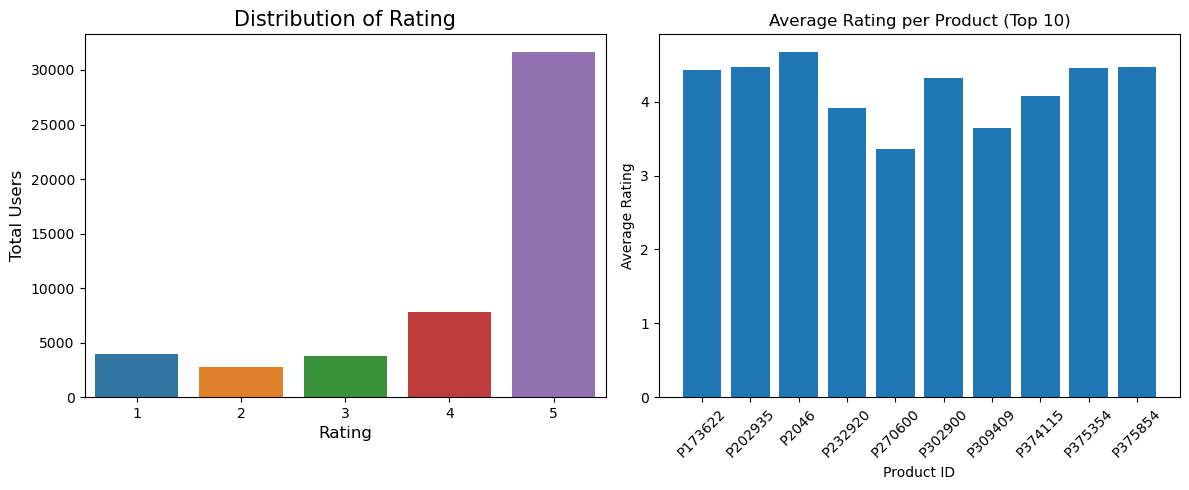

In [26]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot distribution of rating
sns.countplot(x='rating', data=df_review, ax=axes[0])
axes[0].set_xlabel('Rating', fontsize=12)
axes[0].set_ylabel('Total Users', fontsize=12)
axes[0].set_title('Distribution of Rating', fontsize=15)

# Calculate average rating per product
product_avg_rating = df_review.groupby('product_id')['rating'].mean().head(10)

# Plot average rating per product
axes[1].bar(product_avg_rating.index, product_avg_rating.values)
axes[1].set_xlabel('Product ID')
axes[1].set_ylabel('Average Rating')
axes[1].set_title('Average Rating per Product (Top 10)')
axes[1].tick_params(axis='x', rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

analyze the distribution of the number of ratings and mean ratings recorded for each product.

In [27]:
df_review_grp = pd.DataFrame({'Number of Rating':df_review.groupby('product_id').count()['rating'], 'Mean Rating':df_review.groupby('product_id').mean()['rating']})
df_review_grp = df_review_grp.sort_values('Number of Rating', ascending=False)
df_review_grp.head()

/tmp/ipykernel_32/3960705922.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_review_grp = pd.DataFrame({'Number of Rating':df_review.groupby('product_id').count()['rating'], 'Mean Rating':df_review.groupby('product_id').mean()['rating']})


,Number of Rating,Mean Rating
product_id,,
P505160,200,4.480000
P504026,155,4.870968
P503991,155,4.870968
P505211,147,4.482993
P504506,144,4.798611


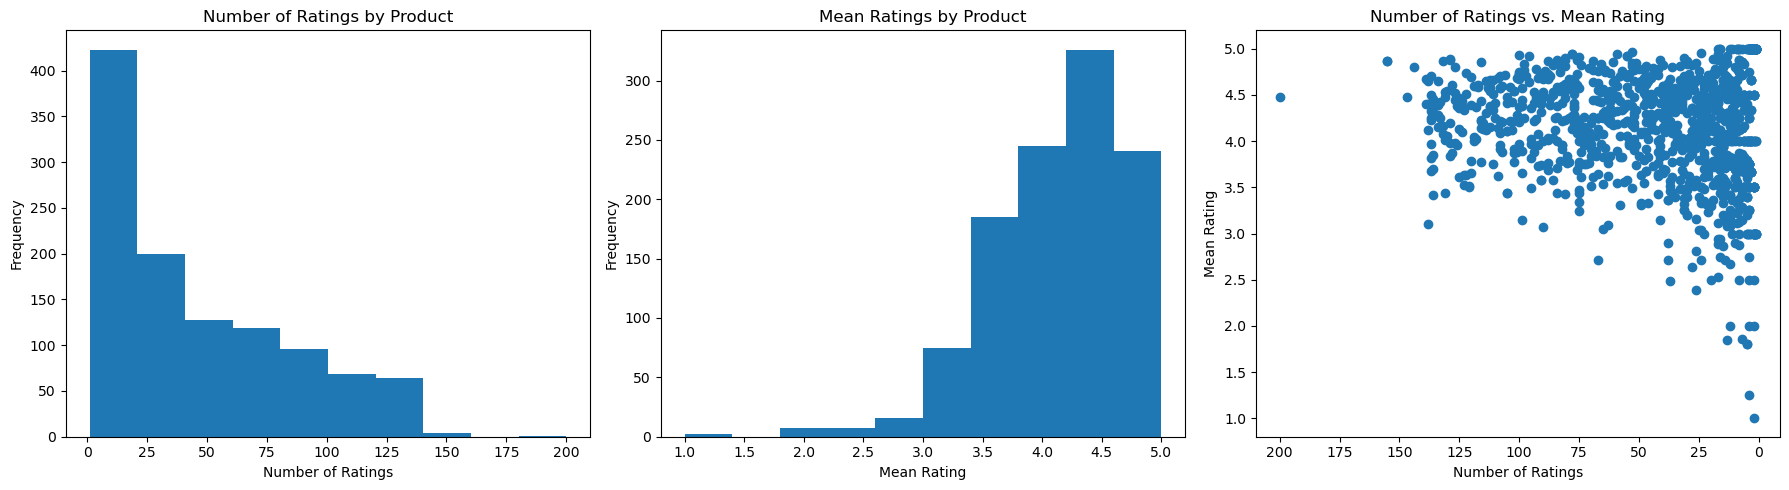

In [28]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot histogram for number of ratings by product
axes[0].hist(df_review_grp['Number of Rating'], bins=10)
axes[0].set_xlabel('Number of Ratings')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Number of Ratings by Product')

# Plot histogram for mean ratings by product
axes[1].hist(df_review_grp['Mean Rating'], bins=10)
axes[1].set_xlabel('Mean Rating')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Mean Ratings by Product')

# Create a scatterplot of Number of Ratings vs. Mean Rating
axes[2].scatter(df_review_grp['Number of Rating'], df_review_grp['Mean Rating'])
axes[2].set_xlabel('Number of Ratings')
axes[2].set_ylabel('Mean Rating')
axes[2].set_title('Number of Ratings vs. Mean Rating')

# Invert the x-axis of the scatterplot
axes[2].invert_xaxis()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

# Content-Based Filtering

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import hstack
from tabulate import tabulate
from sklearn.metrics import precision_score, recall_score

In [30]:
# Feature Engineering
tfidf = TfidfVectorizer()
ingredient_vector = tfidf.fit_transform(df_product['ingredients'])
prim_category_vector = tfidf.fit_transform(df_product['primary_category'])
tert_category_vector = tfidf.fit_transform(df_product['tertiary_category'])

# Combine ingredient and category vectors
feature_vectors = hstack((ingredient_vector, prim_category_vector, tert_category_vector))

In [31]:
# Similarity Calculation
similarity_matrix = cosine_similarity(feature_vectors)
similarity_matrix

array([[1.        , 0.75353382, 0.76443952, ..., 0.80221979, 0.6782589 ,
        0.00949455],
       [0.75353382, 1.        , 0.91825784, ..., 0.60787055, 0.44235932,
        0.00506409],
       [0.76443952, 0.91825784, 1.        , ..., 0.6002254 , 0.43155888,
        0.0058402 ],
       ...,
       [0.80221979, 0.60787055, 0.6002254 , ..., 1.        , 0.67522905,
        0.04319711],
       [0.6782589 , 0.44235932, 0.43155888, ..., 0.67522905, 1.        ,
        0.03056578],
       [0.00949455, 0.00506409, 0.0058402 , ..., 0.04319711, 0.03056578,
        1.        ]])

In [32]:
# Create a DataFrame from the cosine similarity matrix
sim_df = pd.DataFrame(similarity_matrix, index=df_product['product_id'], columns=df_product['product_id'])

# Print the shape of the DataFrame
print('Shape:', sim_df.shape)

# sample of the cosine similarity DataFrame
sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (6642, 6642)


product_id,P500606,P483662,P430910,P501687,P442734
product_id,,,,,
P469102,0.006751,0.000000,0.030293,0.039041,0.015038
P397665,0.031275,0.040026,0.010865,0.005701,0.034023
P481377,0.007799,0.007605,0.334685,0.340024,0.006125
P461600,0.506776,0.466299,0.005326,0.005960,0.031491
P422905,0.016008,0.011395,0.017614,0.018594,0.379430
P482263,0.444789,0.410472,0.002666,0.000000,0.017110
P479734,0.017136,0.050994,0.017292,0.011651,0.365741
P457828,0.463426,0.458255,0.000568,0.000000,0.114641
P474824,0.017567,0.010696,0.019336,0.013645,0.710104


In [33]:
# Reset indices of the dataframe
df_product = df_product.reset_index(drop=True)

# Top-10 Recommendations: Content-Based Filtering

In [34]:
# Recommendation Generation
def get_recommendations(product_id, top_n=5):
    product_index = df_product[df_product['product_id'] == product_id].index[0]
    similarities = similarity_matrix[product_index]
    similar_indices = np.argsort(similarities)[::-1][1:top_n+1]  # Exclude the product itself
    recommendations = df_product.loc[similar_indices, ['product_name', 'brand_name', 'primary_category', 'tertiary_category']]
    recommendations.insert(0, 'rank', range(1, top_n+1))  # Add a rank column at the beginning
    return recommendations

In [35]:
# Example usage
product_id = 'P473671'  # Example product ID

# Print information about the product
info_product = df_product[df_product['product_id'] == product_id][['product_name', 'brand_name', 'primary_category', 'tertiary_category']]
product_table = tabulate(info_product, headers='keys', tablefmt='psql', )

# Get recommendations
top_n = 10  # Specify the number of recommendations
recommendations = get_recommendations(product_id, top_n=top_n)

# Print the recommendations
recommendations_table = tabulate(recommendations, headers='keys', tablefmt='psql', showindex=False)

# Display the result
print("Product Information:")
print(product_table)
print("\nTop-{} Recommendations:".format(top_n))
print(recommendations_table)

Product Information:
+----+-------------------------+--------------+--------------------+---------------------+
|    | product_name            | brand_name   | primary_category   | tertiary_category   |
|----+-------------------------+--------------+--------------------+---------------------|
|  0 | Fragrance Discovery Set | 19-69        | Fragrance          | Perfume Gift Sets   |
+----+-------------------------+--------------+--------------------+---------------------+

Top-10 Recommendations:
+--------+---------------------------------------------------+--------------------+--------------------+---------------------+
|   rank | product_name                                      | brand_name         | primary_category   | tertiary_category   |
|--------+---------------------------------------------------+--------------------+--------------------+---------------------|
|      1 | Wild Poppy Perfume Set                            | NEST New York      | Fragrance          | Perfume Gift 

# Collaborative Filtering

In [36]:
from surprise import accuracy
from surprise import Dataset, Reader, KNNBasic, SVD, NMF
from surprise.model_selection import train_test_split
from surprise.model_selection.validation import cross_validate
from surprise.accuracy import rmse, mae
from surprise.prediction_algorithms import Prediction
from sklearn.metrics import precision_score, recall_score, f1_score

In [37]:
# Create a Surprise Dataset
reader = Reader(rating_scale=(0, 5))
surprise_data = Dataset.load_from_df(df_review, reader)

In [38]:
# Split the data into training and testing sets
trainset, testset = train_test_split(surprise_data, test_size=.2, random_state=42)

## SVD

In [39]:
# Use SVD algorithm
model_svd = SVD()

In [40]:
# Perform cross-validation on surprise_data (train-test)
cv_results = cross_validate(model_svd, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Display the average RMSE and MAE scores of SVD
print("Cross-validation Results (SVD):")
print(f"RMSE: {cv_results['test_rmse'].mean()}")
print(f"MAE: {cv_results['test_mae'].mean()}")

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2079  1.2070  1.1783  1.1961  1.1871  1.1953  0.0114  
MAE (testset)     0.9198  0.9222  0.9057  0.9122  0.9103  0.9140  0.0061  
Fit time          1.01    0.95    0.90    0.94    1.10    0.98    0.07    
Test time         0.10    0.09    0.10    0.09    0.09    0.09    0.01    
Cross-validation Results (SVD):
RMSE: 1.1952749888150114
MAE: 0.9140380099069159


In [41]:
# Train the model on the whole train dataset
trainset = surprise_data.build_full_trainset()
model_svd.fit(trainset)

In [42]:
# Make predictions for the test set
predictions = model_svd.test(testset)

# Convert Surprise Prediction objects to a format suitable for sklearn evaluation metrics
true_labels = np.array([pred.r_ui for pred in predictions])
predicted_labels = np.array([pred.est for pred in predictions])

# Binarize the true labels and predicted labels (e.g., using a threshold)
threshold = 3
binarized_true_labels = (true_labels >= threshold).astype(int)
binarized_predicted_labels = (predicted_labels >= threshold).astype(int)

# Compute precision, recall, and F1-score
precision = precision_score(binarized_true_labels, binarized_predicted_labels)
recall = recall_score(binarized_true_labels, binarized_predicted_labels)
f1 = f1_score(binarized_true_labels, binarized_predicted_labels)

# Compute RMSE and MAE
rmse_score = rmse(predictions)
mae_score = mae(predictions)

# Display the evaluation metrics
print("Evaluation Metrics of SVD:")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"RMSE: {rmse_score}")
print(f"MAE: {mae_score}")

RMSE: 0.7998
MAE:  0.6083
Evaluation Metrics of SVD:
Precision: 0.9194096411127628
Recall: 0.9982706940281301
F1-score: 0.9572186601812955
RMSE: 0.7998014408970047
MAE: 0.6082839104561243


# Hyperparameter Tuning

In [43]:
from surprise.model_selection import GridSearchCV

In [44]:
# Define the parameter grid for hyperparameter tuning
param_grid = {'n_factors': [50, 100],
              'n_epochs': [20, 30, 50],     # Number of epochs
              'lr_all': [0.005, 0.01, 0.001, 0.002], # Learning rate for all parameters
              'reg_all': [0.05, 0.1, 0.01, 0.2]}   # Regularization term for all parameters

# Use GridSearchCV to find the best hyperparameters
model_tune = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=-1)
model_tune.fit(surprise_data)

In [45]:
# Get the best hyperparameters and the corresponding RMSE and MAE scores
best_rmse = model_tune.best_score['rmse']
best_mae = model_tune.best_score['mae']
best_params = model_tune.best_params['rmse']

print(f"Best RMSE: {best_rmse}")
print(f"Best MAE: {best_mae}")
print(f"Best Parameters: {best_params}")

Best RMSE: 1.1850904552329886
Best MAE: 0.896719492786719
Best Parameters: {'n_factors': 50, 'n_epochs': 50, 'lr_all': 0.01, 'reg_all': 0.1}


In [46]:
# Train the model on the whole training set with the best parameters
best_model = SVD(**best_params)
best_model.fit(surprise_data.build_full_trainset())

In [47]:
# Make predictions for the test set
predictions = best_model.test(testset)

# Convert Surprise Prediction objects to a format suitable for sklearn evaluation metrics
true_labels = np.array([pred.r_ui for pred in predictions])
predicted_labels = np.array([pred.est for pred in predictions])

# Binarize the true labels and predicted labels (e.g., using a threshold)
threshold = 3
binarized_true_labels = (true_labels >= threshold).astype(int)
binarized_predicted_labels = (predicted_labels >= threshold).astype(int)

# Compute precision, recall, and F1-score
precision = precision_score(binarized_true_labels, binarized_predicted_labels)
recall = recall_score(binarized_true_labels, binarized_predicted_labels)
f1 = f1_score(binarized_true_labels, binarized_predicted_labels)

# Compute RMSE and MAE
rmse_score = rmse(predictions)
mae_score = mae(predictions)

# Display the evaluation metrics
print("Evaluation Metrics of SVD:")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"RMSE: {rmse_score}")
print(f"MAE: {mae_score}")

RMSE: 0.3348
MAE:  0.2539
Evaluation Metrics of SVD:
Precision: 0.9945989427717766
Recall: 0.9978095457689647
F1-score: 0.9962016574585636
RMSE: 0.33477321373851543
MAE: 0.25386913778895637


# Top-10 recommenations for a user

In [48]:
# Example usage: Get top-N recommendations for a user
user_id = testset[10][0] 
#user_id = df_review['author_id'].sample(10000).iloc[0]
n = 10  # Number of recommendations

# Get a list of all unique product IDs
all_product_ids = df_review['product_id'].unique()

# Remove products that the user has already rated
products_rated_by_user = df_review[df_review['author_id'] == user_id]['product_id'].values
products_to_predict = np.setdiff1d(all_product_ids, products_rated_by_user)

# Make predictions for the products to predict
predictions = [best_model.predict(user_id, product_id) for product_id in products_to_predict]

# Sort the predictions by estimated ratings (in descending order)
predictions.sort(key=lambda x: x.est, reverse=True)

In [49]:
# List products with high ratings by the sample user
sample_user_ratings = df_review[(df_review['author_id'] == user_id) & (df_review['rating'] >= 4.0)]
sample_user_products = product_info[product_info['product_id'].isin(sample_user_ratings['product_id'])]

print("\nProducts with High Ratings by User", user_id, ":")

# Create a list to store the product details
product_details = []

# Populate the product_details list
for idx, product in sample_user_products.iterrows():
    product_id = product['product_id']
    product_name = product['product_name']
    primary_category = product['primary_category']
    rating = sample_user_ratings[sample_user_ratings['product_id'] == product_id]['rating'].values[0]
    product_details.append([product_id, product_name, primary_category, rating])

# Display the product details as a table
headers = ["Product ID", "Product Name", "Primary Category", "Rating"]
print(tabulate(product_details, headers=headers, tablefmt="psql"))

# Get the top-N recommended products
top_n_recommendations = [prediction.iid for prediction in predictions[:n]]

# Populate the recommendations list
recommendations = []
for i, prediction in enumerate(predictions[:n], start=1):
    product_id = prediction.iid

    # Find the product details in df_product
    product_details = product_info[product_info['product_id'] == product_id]

    if len(product_details) > 0:
        product_name = product_details['product_name'].values[0]
        primary_category = product_details['primary_category'].values[0]

        # Append the recommendation to the list
        recommendations.append([i, product_id, product_name, primary_category])

# Display the top-N recommendations as a table
headers = ["Rank", "Product ID", "Product Name", "Primary Category"]
print(f"\nTop-{n} Recommendations for User {user_id}:")
print(tabulate(recommendations, headers=headers, tablefmt="psql"))


Products with High Ratings by User 1845533064 :
+--------------+----------------------------------------------------------------------------+--------------------+----------+
| Product ID   | Product Name                                                               | Primary Category   |   Rating |
|--------------+----------------------------------------------------------------------------+--------------------+----------|
| P480608      | Equilibrium Instant Plumping Eye Mask                                      | Skincare           |        4 |
| P504277      | Face Stone Nourishing Solid Refillable Facial Oil with Tamanu + Blue Tansy | Skincare           |        4 |
| P504506      | The Silk Serum Wrinkle-Smoothing Retinol Alternative                       | Skincare           |        5 |
| P502741      | SuperSolutions 10% Azelaic Serum Redness Relief Solution                   | Skincare           |        5 |
| P483701      | Daily Essentials Travel Set                         